In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
my_data=pd.read_csv("C:/Users/Annamalai/Downloads/UNSW_NB15_training-set.csv")

In [5]:
my_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,service,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,service,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,service,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,service,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,service,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [6]:
my_data.drop(labels=['id','service'],axis=1,inplace=True)

In [7]:
my_data.head()

,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,INT,2,0,496,0,90909.0902,254,0,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,INT,2,0,1762,0,125000.0003,254,0,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,INT,2,0,1068,0,200000.0051,254,0,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,INT,2,0,900,0,166666.6608,254,0,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,INT,2,0,2126,0,100000.0025,254,0,...,1,3,0,0,0,2,3,0,Normal,0


In [9]:
#proprocessing of the Data
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

my_data=my_data.apply(LabelEncoder().fit_transform)

In [10]:
my_data.head()

,dur,proto,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,11,117,4,1,0,206,0,40603,9,0,...,0,1,0,0,0,0,1,0,6,0
1,8,117,4,1,0,853,0,40608,9,0,...,0,1,0,0,0,0,1,0,6,0
2,5,117,4,1,0,503,0,40611,9,0,...,0,2,0,0,0,0,2,0,6,0
3,6,117,4,1,0,418,0,40610,9,0,...,0,2,0,0,0,1,2,0,6,0
4,10,117,4,1,0,1024,0,40605,9,0,...,0,2,0,0,0,1,2,0,6,0


In [15]:
from sklearn.compose import ColumnTransformer

columnTransformer=ColumnTransformer([('encoder',OneHotEncoder(),[41])],remainder='passthrough')
data=np.array(columnTransformer.fit_transform(my_data),dtype=np.int)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import time

In [26]:
x=data[:,:-1]
y=data[:,-1]

In [29]:
x.shape,y.shape

((82332, 51), (82332,))

In [30]:

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,stratify=y)

In [43]:
error=list()
accuracy=list()
for i in range(1,25):
                model=make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=i))
                model.fit(x_train,y_train)
                k=model.predict(x_test)
                acc=accuracy_score(k,y_test)
                print(f"The Accuracy when k = {i} is {acc}")
                accuracy.append(acc)
                error.append(np.mean(k!=y_test))
                

The Accuracy when k = 1 is 0.9998785449687253
The Accuracy when k = 2 is 0.9996963624218134
The Accuracy when k = 3 is 0.9997570899374506
The Accuracy when k = 4 is 0.9995749073905387
The Accuracy when k = 5 is 0.999453452359264
The Accuracy when k = 6 is 0.999635634906176
The Accuracy when k = 7 is 0.9996963624218134
The Accuracy when k = 8 is 0.999635634906176
The Accuracy when k = 9 is 0.9995749073905387
The Accuracy when k = 10 is 0.9995749073905387
The Accuracy when k = 11 is 0.9995749073905387
The Accuracy when k = 12 is 0.9993927248436266
The Accuracy when k = 13 is 0.9996963624218134
The Accuracy when k = 14 is 0.9995749073905387
The Accuracy when k = 15 is 0.999635634906176
The Accuracy when k = 16 is 0.9993927248436266
The Accuracy when k = 17 is 0.999453452359264
The Accuracy when k = 18 is 0.9993319973279893
The Accuracy when k = 19 is 0.9993319973279893
The Accuracy when k = 20 is 0.9992712698123519
The Accuracy when k = 21 is 0.9992712698123519
The Accuracy when k = 22 is

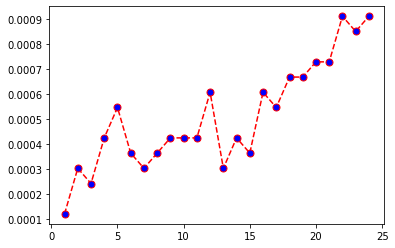

In [53]:
import matplotlib.pyplot as plt

plt.plot(range(1,25),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=7)
plt.show()

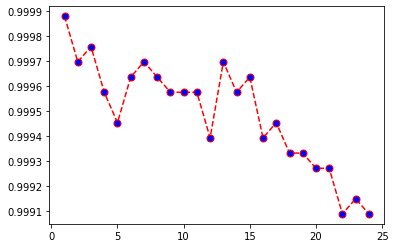

In [54]:
plt.plot(range(1,25),accuracy,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=7)
plt.show()

<AxesSubplot:>

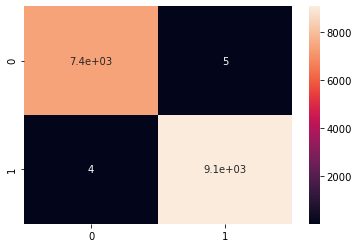

In [39]:
sns.heatmap(confusion_matrix(k,y_test),annot=True)

In [48]:
len(error),len(range(1,25))

(24, 24)

In [51]:
error

[0.00012145503127467055,
 0.00030363757818667637,
 0.0002429100625493411,
 0.0004250926094613469,
 0.0005465476407360175,
 0.00036436509382401167,
 0.00030363757818667637,
 0.00036436509382401167,
 0.0004250926094613469,
 0.0004250926094613469,
 0.0004250926094613469,
 0.0006072751563733527,
 0.00030363757818667637,
 0.0004250926094613469,
 0.00036436509382401167,
 0.0006072751563733527,
 0.0005465476407360175,
 0.0006680026720106881,
 0.0006680026720106881,
 0.0007287301876480233,
 0.0007287301876480233,
 0.0009109127345600292,
 0.0008501852189226938,
 0.0009109127345600292]

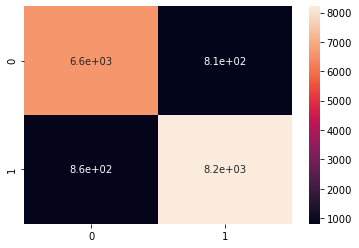

In [61]:
#accuracy is High when K=1
import pickle
model=KNeighborsClassifier(n_neighbors=1)
model.fit(x_train,y_train)
ans=model.predict(x_test)
sns.heatmap(confusion_matrix(y_test,ans),annot=True)
plt.show()

In [63]:
accuracy_score(y_test,ans)*100

89.89494139794742

In [65]:
#Saving the model to 
import joblib
filename="E:/Dataset/Models/Knn_model_research.sav"
joblib.dump(model,filename)

['E:/Dataset/Models/Knn_model_research.sav']

In [66]:
h=joblib.load(filename)
h.score(x_test,y_test)

0.8989494139794741